In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy.stats import uniform

In [2]:
df = pd.read_csv('dodgers.csv')

In [3]:
df.isnull().any()

month          False
day            False
attend         False
day_of_week    False
opponent       False
temp           False
skies          False
day_night      False
cap            False
shirt          False
fireworks      False
bobblehead     False
dtype: bool

In [4]:
print(df['skies'].unique())
print(df['day_night'].unique())

['Clear ' 'Cloudy']
['Day' 'Night']


In [5]:
# create maps
months = {'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11}
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

### note the SPACE ' ' after clear!
sky = {'Cloudy':0,'Clear ':1}
dn = {'Day':0,'Night':1}

In [6]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [7]:
df['m'] = df['month'].map(months)
df['d'] = df['day_of_week'].map(days)
df['skies'] = df['skies'].map(sky)
df['day_night'] = df['day_night'].map(dn)
df['cap'] = df['cap'].map({'YES': 1, 'NO': 0})
df['shirt'] = df['shirt'].map({'YES': 1, 'NO': 0})
df['fireworks'] = df['fireworks'].map({'YES': 1, 'NO': 0})
df['bobblehead'] = df['bobblehead'].map({'YES': 1, 'NO': 0})

In [8]:
le = LabelEncoder()
df['opponent_label'] = le.fit_transform(df['opponent'])

In [9]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,m,d,opponent_label
0,APR,10,56000,Tuesday,Pirates,67,1,0,0,0,0,0,4,2,12
1,APR,11,29729,Wednesday,Pirates,58,0,1,0,0,0,0,4,3,12
2,APR,12,28328,Thursday,Pirates,57,0,1,0,0,0,0,4,4,12
3,APR,13,31601,Friday,Padres,54,0,1,0,0,1,0,4,5,10
4,APR,14,46549,Saturday,Padres,57,0,1,0,0,0,0,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,0,1,0,0,0,0,9,6,14
77,SEP,30,35607,Sunday,Rockies,95,1,0,0,0,0,0,9,0,14
78,OCT,1,33624,Monday,Giants,86,1,1,0,0,0,0,10,1,6
79,OCT,2,42473,Tuesday,Giants,83,1,1,0,0,0,0,10,2,6


In [10]:
df['attend'].describe()

count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64

In [11]:
df['temp'].describe()

count    81.000000
mean     73.148148
std       8.317318
min      54.000000
25%      67.000000
50%      73.000000
75%      79.000000
max      95.000000
Name: temp, dtype: float64

In [12]:
df.groupby('m').attend.describe()

,count,mean,std,min,25%,50%,75%,max
m,,,,,,,,
4,12.0,39591.916667,10882.001583,26345.0,29378.75,41186.5,47100.00,56000.0
5,18.0,37345.722222,7721.822307,24312.0,33413.25,36422.0,43011.25,51137.0
6,9.0,47940.444444,4919.203063,40432.0,44217.00,49006.0,50559.00,55279.0
7,12.0,43884.250000,9399.324716,32238.0,34340.75,41914.0,53516.00,55359.0
8,15.0,42751.533333,7256.695921,32659.0,37353.00,40284.0,45062.50,56000.0
9,12.0,38955.083333,5135.247758,31607.0,35717.25,38650.0,41155.25,50560.0
10,3.0,36703.666667,5000.193030,33624.0,33819.00,34014.0,38243.50,42473.0


In [13]:
df.groupby('d').attend.describe()

,count,mean,std,min,25%,50%,75%,max
d,,,,,,,,
0,13.0,42268.846154,7596.350657,31607.0,35754.00,41907.0,48753.00,55359.0
1,12.0,34965.666667,7005.957949,24312.0,32553.75,33582.0,37162.50,50559.0
2,13.0,47741.230769,8291.390044,32799.0,42473.00,51137.0,55024.00,56000.0
3,12.0,37585.166667,8696.234889,25509.0,32927.00,36840.0,41003.25,53570.0
4,5.0,40407.400000,12411.591328,26773.0,28328.00,43309.0,49006.00,54621.0
5,13.0,40116.923077,4694.879400,31601.0,37133.00,40167.0,43537.00,49763.0
6,13.0,43072.923077,6336.482298,33735.0,39383.00,42449.0,46549.00,54242.0


In [14]:
df.groupby('fireworks').attend.describe()

,count,mean,std,min,25%,50%,75%,max
fireworks,,,,,,,,
0,67.0,41032.179104,8769.219806,24312.0,33938.50,40284.0,47915.0,56000.0
1,14.0,41077.857143,5768.351782,31601.0,37255.25,40299.5,43789.0,53570.0


In [53]:
df.groupby('bobblehead').attend.describe()

,count,mean,std,min,25%,50%,75%,max
bobblehead,,,,,,,,
0,70.0,39137.928571,7182.487368,24312.0,33911.25,39549.0,43669.0,56000.0
1,11.0,53144.636364,2887.153279,47077.0,51984.50,54242.0,55151.5,56000.0


In [55]:
df.groupby('shirt').attend.describe()

,count,mean,std,min,25%,50%,75%,max
shirt,,,,,,,,
0,78.0,40824.551282,8338.638979,24312.0,34133.75,40170.0,46214.25,56000.0
1,3.0,46643.666667,5295.079351,40619.0,44686.00,48753.0,49656.00,50559.0


In [54]:
df.groupby(['d','fireworks']).attend.describe()

count          mean           std      min       25%      50%  \
d fireworks                                                                  
0 0           13.0  42268.846154   7596.350657  31607.0  35754.00  41907.0   
1 0           12.0  34965.666667   7005.957949  24312.0  32553.75  33582.0   
2 0           13.0  47741.230769   8291.390044  32799.0  42473.00  51137.0   
3 0           11.0  36132.000000   7437.244046  25509.0  31861.00  36596.0   
  1            1.0  53570.000000           NaN  53570.0  53570.00  53570.0   
4 0            5.0  40407.400000  12411.591328  26773.0  28328.00  43309.0   
5 1           13.0  40116.923077   4694.879400  31601.0  37133.00  40167.0   
6 0           13.0  43072.923077   6336.482298  33735.0  39383.00  42449.0   

                 75%      max  
d fireworks                    
0 0          48753.0  55359.0  
1 0          37162.5  50559.0  
2 0          55024.0  56000.0  
3 0          40064.0  50560.0  
  1          53570.0  53570.0  
4 0          49006.0  54621.0  
5 1          43537.0  49763.0  
6 0          46549.0  54242.0

In [15]:
df.groupby(['d','bobblehead']).attend.describe()

count          mean          std      min       25%      50%  \
d bobblehead                                                                 
0 0            12.0  41178.000000  6787.843733  31607.0  35717.25  40811.0   
  1             1.0  55359.000000          NaN  55359.0  55359.00  55359.0   
1 0            12.0  34965.666667  7005.957949  24312.0  32553.75  33582.0   
2 0             7.0  43326.714286  8875.037572  32799.0  37251.50  42473.0   
  1             6.0  52891.500000  3370.480841  47077.0  51560.75  53928.0   
3 0            12.0  37585.166667  8696.234889  25509.0  32927.00  36840.0   
4 0             3.0  32803.333333  9131.335079  26773.0  27550.50  28328.0   
  1             2.0  51813.500000  3970.404576  49006.0  50409.75  51813.5   
5 0            13.0  40116.923077  4694.879400  31601.0  37133.00  40167.0   
6 0            11.0  41062.909091  4392.208248  33735.0  37972.00  40724.0   
  1             2.0  54128.000000   161.220346  54014.0  54071.00  54128.0   

                   75%      max  
d bobblehead                     
0 0           45192.00  53504.0  
  1           55359.00  55359.0  
1 0           37162.50  50559.0  
2 0           48756.00  56000.0  
  1           55215.25  56000.0  
3 0           41003.25  53570.0  
4 0           35818.50  43309.0  
  1           53217.25  54621.0  
5 0           43537.00  49763.0  
6 0           44713.50  46588.0  
  1           54185.00  54242.0

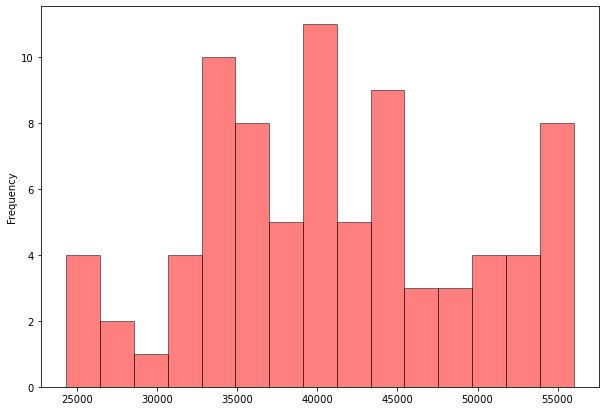

In [16]:
df['attend'].plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7),bins=15)

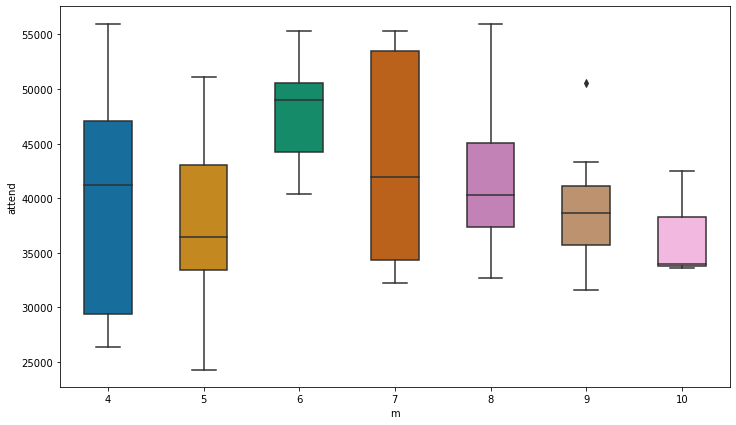

In [17]:
plt.figure(figsize=(12,7))
bplot = sns.boxplot(y='attend',x='m',data=df, width=0.5,palette="colorblind")

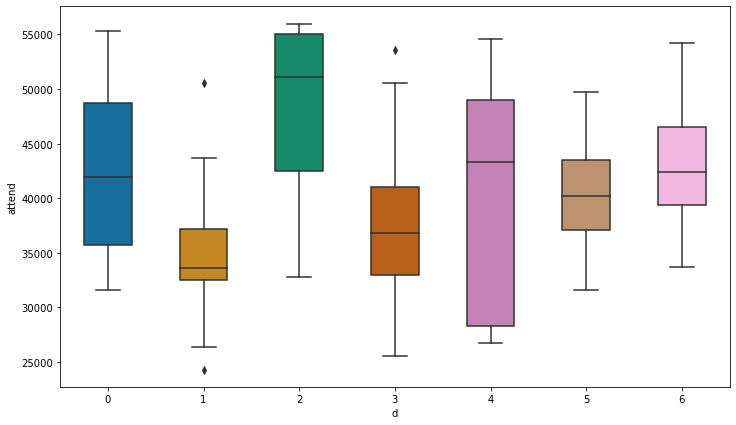

In [18]:
plt.figure(figsize=(12,7))
bplot = sns.boxplot(y='attend', x='d', data=df, width=0.5, palette="colorblind")

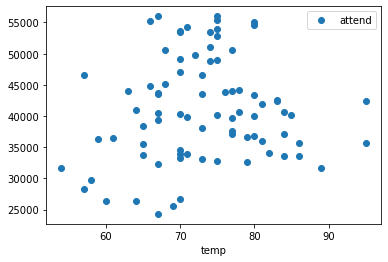

In [19]:
df.plot(x='temp',y='attend', style='o')

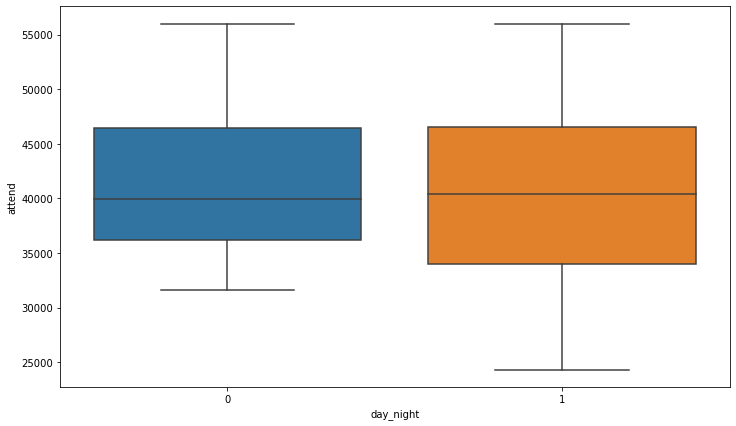

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot(x='day_night', y='attend', data=df)

In [21]:
df[['attend','day','month','temp','skies','day_night','cap','shirt','bobblehead','opponent_label']].corr()

,attend,day,temp,skies,day_night,cap,shirt,bobblehead,opponent_label
attend,1.000000,0.027093,0.098951,0.150963,-0.043544,-0.055002,0.133269,0.581895,0.045021
day,0.027093,1.000000,-0.127612,0.038396,-0.039828,-0.202274,-0.030182,0.145363,-0.161508
temp,0.098951,-0.127612,1.000000,0.316584,-0.272141,0.064521,0.004394,0.049573,0.143428
skies,0.150963,0.038396,0.316584,1.000000,-0.188903,-0.099671,0.108566,0.049349,0.118707
day_night,-0.043544,-0.039828,-0.272141,-0.188903,1.000000,-0.128951,-0.074796,0.188982,-0.136669
cap,-0.055002,-0.202274,0.064521,-0.099671,-0.128951,1.000000,-0.031204,-0.063074,0.009916
shirt,0.133269,-0.030182,0.004394,0.108566,-0.074796,-0.031204,1.000000,-0.077743,-0.097778
bobblehead,0.581895,0.145363,0.049573,0.049349,0.188982,-0.063074,-0.077743,1.000000,0.055025
opponent_label,0.045021,-0.161508,0.143428,0.118707,-0.136669,0.009916,-0.097778,0.055025,1.000000


In [22]:
# month	day	attend	day_of_week	opponent	temp	skies	day_night	cap	shirt	fireworks	bobblehead	m	d
#XX = df[["m", "opponent_label","temp","skies","day_night","cap","shirt","fireworks","bobblehead","attend"]]
#XX = df[["m","d", "opponent_label","day_night","cap","shirt","fireworks","bobblehead"]]
XX = df[["m","d","bobblehead"]]
YY = df["attend"]

In [23]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, YY, test_size=0.2, random_state=0)

In [25]:
regressor = LinearRegression()  
regressor.fit(XX_train, yy_train)

LinearRegression()

In [26]:
XX.columns

Index(['m', 'd', 'bobblehead'], dtype='object')

In [27]:
coeff_df = pd.DataFrame(regressor.coef_, XX.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
m,181.674476
d,145.770023
bobblehead,14564.271687


In [28]:
yy_pred = regressor.predict(XX_test)

In [29]:
ap_df = pd.DataFrame({'Actual': yy_test, 'Predicted': yy_pred})
ap_df.head(25)

,Actual,Predicted
22,44005,38102.061279
27,51137,52957.873012
61,39805,39375.934821
13,32799,38393.601325
71,43309,39411.839274
74,35754,38828.759182
30,50559,38429.505778
55,32659,38792.854729
53,46588,39521.704843
26,38016,38247.831302


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yy_test, yy_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yy_test, yy_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yy_test, yy_pred)))

Mean Absolute Error: 4637.0912590409835
Mean Squared Error: 38975976.90325576
Root Mean Squared Error: 6243.0743150515


In [31]:
X = df[["m", "d","bobblehead"]]
Y = df["attend"] 

In [32]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [33]:
Xscaled = add_constant(Xscaled)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, Y, test_size = 0.3, random_state = 86)

In [35]:
y_test

32    43494
54    42495
46    32238
8     26345
55    32659
21    39383
71    43309
19    47077
35    53504
77    35607
80    34014
59    56000
15    35591
61    39805
50    52832
63    41907
74    35754
34    45210
64    54621
36    49006
68    33540
42    53570
25    33306
6     26376
65    37622
Name: attend, dtype: int64

In [36]:
lin_model = OLS(y_train, X_train).fit()

In [37]:
lin_pred = lin_model.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print(f"R^2 score:{lin_model_score}")

R^2 score:0.38175643373806223


In [38]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     8.062
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           0.000166
Time:                        21:56:21   Log-Likelihood:                -572.71
No. Observations:                  56   AIC:                             1153.
Df Residuals:                      52   BIC:                             1162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.151e+04    941.587     44.083      0.000    3.96e+04    4.34e+04
x1           362.5277    915.012      0.396      0.694   -1473.578    2198.633
x2            42.5680    925.589      0.046      0.963   -1814.762    1899.898
x3          5054.8545   1028.561      4.914      0.000    2990.896    7118.812
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.197
Skew:                           0.145   Prob(JB):                        0.906
Kurtosis:                       2.988   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
lin_model.fittedvalues

56    54522.469316
33    39428.019890
76    40049.110774
47    39566.940756
62    39848.891422
11    38925.417043
7     38966.282700
73    40049.110774
10    53803.323224
18    39146.069223
39    54281.384307
60    39787.592936
78    40147.165982
51    39787.592936
38    39448.452719
66    40049.110774
67    39926.513802
1     38986.715529
75    40028.677945
31    54122.030613
5     38925.417043
70    39987.812288
26    39146.069223
12    39146.069223
43    39628.239242
69    39967.379459
53    39848.891422
22    39125.636395
2     39007.148358
3     39027.581186
48    39587.373584
24    39248.233367
37    39428.019890
16    39248.233367
72    40028.677945
23    39227.800538
0     38966.282700
49    39546.507927
52    39828.458594
58    39746.727279
4     39048.014015
14    39186.934881
29    39207.367710
79    40167.598811
41    39566.940756
13    39166.502052
17    39125.636395
45    39526.075098
57    39787.592936
30    39346.288575
27    53921.811261
9     39027.581186
40    39546.

In [40]:
lin_model.predict(X_test)

array([39387.15423261, 39726.29445011, 39546.50792701, 38986.71552899,
       39746.72727882, 39248.23336692, 40008.24511675, 53921.81126085,
       39325.85574649, 39926.51380192, 40188.03163986, 54522.46931628,
       39227.80053821, 39828.45859365, 54322.24996447, 39726.29445011,
       39926.51380192, 39448.45271873, 54563.3349737 , 54162.89627007,
       39946.94663063, 39587.37358442, 39125.63639468, 38945.84987157,
       39828.45859365])

In [41]:
ols_df = pd.DataFrame({'Actual': yy_test, 'Predicted': yy_pred})
ap_df.head(25)

,Actual,Predicted
22,44005,38102.061279
27,51137,52957.873012
61,39805,39375.934821
13,32799,38393.601325
71,43309,39411.839274
74,35754,38828.759182
30,50559,38429.505778
55,32659,38792.854729
53,46588,39521.704843
26,38016,38247.831302


In [42]:
uniform.rvs(loc=0, scale =1, size = len(df))

array([0.30591781, 0.30024917, 0.04583136, 0.95664349, 0.45350696,
       0.95078682, 0.28513131, 0.24411281, 0.3231151 , 0.99894309,
       0.15811892, 0.49190913, 0.25513762, 0.52027612, 0.57558855,
       0.41257316, 0.88530245, 0.06639351, 0.0631513 , 0.5461768 ,
       0.62423098, 0.21522445, 0.14664494, 0.12914378, 0.13799106,
       0.39564022, 0.01222476, 0.79304841, 0.25306725, 0.71088756,
       0.29599351, 0.18390909, 0.90501517, 0.67853658, 0.60914521,
       0.06126831, 0.99083911, 0.38214682, 0.7006967 , 0.12696046,
       0.53438616, 0.28357848, 0.66855125, 0.33262579, 0.65077727,
       0.53156182, 0.0578432 , 0.19803012, 0.96337203, 0.86505442,
       0.405561  , 0.70291376, 0.43852807, 0.12224626, 0.07405474,
       0.57942862, 0.56102674, 0.44598871, 0.3278695 , 0.12655139,
       0.1988884 , 0.61449894, 0.96472407, 0.46260042, 0.63129951,
       0.84335401, 0.40074096, 0.67240191, 0.45643102, 0.33235376,
       0.36008698, 0.91923739, 0.46969222, 0.51848291, 0.17396

In [43]:
df2 = df.copy()

In [44]:
np.random.seed(456)

In [45]:
df2['ru'] = uniform.rvs(loc=0, scale =1, size = len(df))

In [46]:
d_train = df2[df2['ru'] >= 0.33]
d_test = df2[df2['ru'] < 0.33]

In [47]:
train_model_fit = smf.ols('attend ~ m + d + bobblehead', data = d_train).fit()

In [48]:
d_train['fitted_vals'] = train_model_fit.fittedvalues

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
d_test['predicted_vals'] = train_model_fit.predict(d_test)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
round(np.power(d_test['attend'].corr(d_test['predicted_vals']),2),3)

0.191

In [51]:
my_fit = smf.ols('attend ~ m + d + bobblehead', data = df).fit()

In [52]:
my_fit.params

Intercept     36497.433885
m               312.644689
d               195.512863
bobblehead    14060.458428
dtype: float64